<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RecSys/blob/Alesya-Moroz-folder/02(1)_profpatolog_modifiedDataset_specialist_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Загрузка библиотек

import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive # Подключаем диск
drive.mount('/content/drive')

Mounted at /content/drive


# Загрузка датасета

Загружаем датасет подготовленный и сохраненный на предыдущем этапе: `profpatolog_modifiedDataset_v1.xlsx`

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/NU_files/стажировка/profpatolog_modifiedDataset_v1.xlsx', index_col=0)

In [ ]:
df.head()

,КлиентПолПредставление,ЗаключениеМК,ДиспансернаяГруппаПредставление,ВредныеФакторы,ЛабораторныеИсследования1_ОАК_ЗначениеПредставление,ЛабораторныеИсследования1_Биохимия_ЗначениеПредставление,ЛабораторныеИсследования1_ОАМ_ЗначениеПредставление,ЛабораторныеИсследования1_МазокИзЗеваИНоса_ЗначениеПредставление,ЛабораторныеИсследования1_Кал_ЗначениеПредставление,ЛабораторныеИсследования1_RW_ЗначениеПредставление,...,Психиатрия2_МКБ101,Психиатрия2_МКБ102,Рентгенология1_МКБ102,Рентгенология2_МКБ102,Психиатрия3_МКБ101,Психиатрия3_МКБ102,Психиатрия4_МКБ101,Психиатрия4_МКБ102,Оториноларингология3_МКБ101,Возраст
0,Женский,Годен,I,11.4,получен,получен,получен,не получен,не получен,не получен,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45
1,Мужской,Годен,IIIа,4.2.5,получен,получен,получен,не получен,не получен,не получен,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34
2,Мужской,ГоденСКоррекциейЗрения,II,4.2.5,получен,получен,получен,не получен,не получен,не получен,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36
3,Мужской,Годен,I,11.1,получен,получен,получен,получен,получен,получен,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33
4,Мужской,ГоденСКоррекциейЗрения,II,11.1,получен,получен,получен,не получен,не получен,не получен,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37


In [ ]:
df.info()
# df.info(verbose=True, buf=None, max_cols=4, memory_usage=None, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1570
Columns: 1625 entries, КлиентПолПредставление to Возраст
dtypes: float64(87), int64(1), object(1537)
memory usage: 19.5+ MB


# Данные по результатам осмотров у профильных специалистов 


> Анализ и парсинг данных по профильным специалистам:
Разделение данных на три категории входных данных:
- количественные данные
- категориальные данные
- текстовые данные



In [ ]:
columns = list(df.columns)
columns[:6]

['КлиентПолПредставление',
 'ЗаключениеМК',
 'ДиспансернаяГруппаПредставление',
 'ВредныеФакторы',
 'ЛабораторныеИсследования1_ОАК_ЗначениеПредставление',
 'ЛабораторныеИсследования1_Биохимия_ЗначениеПредставление']

In [ ]:
# for i, column in enumerate(columns[:7]):
#     string = column

#     string_2 = re.split('_|[0-9]', string)
#     print(string_2)
#     print(len(string_2))

In [ ]:
#@title Определение направлений исследований (по столбцам)

col_specialization = []
for i, column in enumerate(columns):
    string = re.split('_|[0-9]', column)
    if len(string) > 1:
        if string[0] not in col_specialization: 
            col_specialization.append(string[0])    
            print(len(col_specialization), string[0])

1 ЛабораторныеИсследования
2 Рентгенология
3 ПсихиатрияНаркология
4 Офтальмология
5 Оториноларингология
6 ХирургНеИсп
7 Гинекология
8 ФункциональнаяДиагностика
9 Стоматология
10 Эндоскопия
11 Терапия
12 Дерматовенерология
13 Неврология
14 УЗИДиагностика
15 Хирургия
16 ЭКГНеИсп
17 ПроцедурнаяМедсестра
18 Психиатрия
19 ТерапевтНеИсп




---



In [ ]:
def to_analyse(df, specialization):
    col = list(df.filter(regex=specialization).columns)

    for i in range(len(col)):
        print('\n',i, col[i], df[col[i]].unique())

    return col

###  01 ЛабораторныеИсследования
`columns_lab`

In [ ]:
columns_lab = to_analyse(df, specialization=col_specialization[0])


 0 ЛабораторныеИсследования1_ОАК_ЗначениеПредставление ['получен' nan]

 1 ЛабораторныеИсследования1_Биохимия_ЗначениеПредставление ['получен' nan]

 2 ЛабораторныеИсследования1_ОАМ_ЗначениеПредставление ['получен' nan]

 3 ЛабораторныеИсследования1_МазокИзЗеваИНоса_ЗначениеПредставление ['не получен' 'получен' nan]

 4 ЛабораторныеИсследования1_Кал_ЗначениеПредставление ['не получен' 'получен' nan]

 5 ЛабораторныеИсследования1_RW_ЗначениеПредставление ['не получен' 'получен' nan]

 6 ЛабораторныеИсследования1_КровьНаЭнтеробиоз_ЗначениеПредставление ['не получен' 'получен' nan]

 7 ЛабораторныеИсследования1_ДиагнозПредставление1 [nan 'Общий медицинский осмотр']

 8 ЛабораторныеИсследования1_ПрофнепригодностьВременнаяПредставление1 [nan 'Годен']

 9 ЛабораторныеИсследования2_ДиагнозПредставление1 [nan 'Общий медицинский осмотр']

 10 ЛабораторныеИсследования2_ПрофнепригодностьВременнаяПредставление1 [nan 'Годен']

 11 ЛабораторныеИсследования2_ОАК_ЗначениеПредставление [nan 'получен' 



> Основная информация в столбцах - получение или не получение результатов анализов, самих показателей по анализам не наблюдается. При первичном анализе в работе целесообразно использование только столбца



> **??? К уточнению:**
- необходимо ли дополнение датасета детальными данными по лабораторным исследованиям 
- возможно ли получить такие данные от заказчика





In [ ]:
columns_lab

['ЛабораторныеИсследования1_ОАК_ЗначениеПредставление',
 'ЛабораторныеИсследования1_Биохимия_ЗначениеПредставление',
 'ЛабораторныеИсследования1_ОАМ_ЗначениеПредставление',
 'ЛабораторныеИсследования1_МазокИзЗеваИНоса_ЗначениеПредставление',
 'ЛабораторныеИсследования1_Кал_ЗначениеПредставление',
 'ЛабораторныеИсследования1_RW_ЗначениеПредставление',
 'ЛабораторныеИсследования1_КровьНаЭнтеробиоз_ЗначениеПредставление',
 'ЛабораторныеИсследования1_ДиагнозПредставление1',
 'ЛабораторныеИсследования1_ПрофнепригодностьВременнаяПредставление1',
 'ЛабораторныеИсследования2_ДиагнозПредставление1',
 'ЛабораторныеИсследования2_ПрофнепригодностьВременнаяПредставление1',
 'ЛабораторныеИсследования2_ОАК_ЗначениеПредставление',
 'ЛабораторныеИсследования2_Биохимия_ЗначениеПредставление',
 'ЛабораторныеИсследования2_ОАМ_ЗначениеПредставление',
 'ЛабораторныеИсследования2_МазокИзЗеваИНоса_ЗначениеПредставление',
 'ЛабораторныеИсследования2_Кал_ЗначениеПредставление',
 'ЛабораторныеИсследования2_RW_Зн

In [ ]:
columns_lab_to_save = columns_lab[18:27]
columns_lab_to_save

['ЛабораторныеИсследования1_ДиагнозПредставление2',
 'ЛабораторныеИсследования1_ПрофнепригодностьВременнаяПредставление2',
 'ЛабораторныеИсследования2_ДиагнозПредставление2',
 'ЛабораторныеИсследования2_ПрофнепригодностьВременнаяПредставление2',
 'ЛабораторныеИсследования1_Дополнительно_ЗначениеПредставление',
 'ЛабораторныеИсследования1_МКБ101',
 'ЛабораторныеИсследования2_МКБ101',
 'ЛабораторныеИсследования1_МКБ102',
 'ЛабораторныеИсследования2_МКБ102']

In [ ]:
df_lab  = df[columns_lab_to_save]
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1570
Data columns (total 9 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   ЛабораторныеИсследования1_ДиагнозПредставление2                     55 non-null     object
 1   ЛабораторныеИсследования1_ПрофнепригодностьВременнаяПредставление2  54 non-null     object
 2   ЛабораторныеИсследования2_ДиагнозПредставление2                     54 non-null     object
 3   ЛабораторныеИсследования2_ПрофнепригодностьВременнаяПредставление2  54 non-null     object
 4   ЛабораторныеИсследования1_Дополнительно_ЗначениеПредставление       7 non-null      object
 5   ЛабораторныеИсследования1_МКБ101                                    875 non-null    object
 6   ЛабораторныеИсследования2_МКБ101                                    57 non-null     object
 7   ЛабораторныеИсследования1

#### Анализ столбцов 

In [ ]:
df[['ЛабораторныеИсследования1_ПрофнепригодностьВременнаяПредставление2', 'ЛабораторныеИсследования2_ПрофнепригодностьВременнаяПредставление2']].value_counts()

ЛабораторныеИсследования1_ПрофнепригодностьВременнаяПредставление2  ЛабораторныеИсследования2_ПрофнепригодностьВременнаяПредставление2
Годен                                                               Годен                                                                 54
dtype: int64



**Выводы**
- ЛабораторныеИсследования2_ДиагнозПредставление2 - дублирует информацию (к удалению)
- ЛабораторныеИсследования2_ПрофнепригодностьВременнаяПредставление2 - дублирует информацию (к удалению)
---
- ЛабораторныеИсследования1_МКБ102 - разница в 1 позиции (к удалению)
- ЛабораторныеИсследования2_МКБ101 - дублирует информацию (к удалению)
- ЛабораторныеИсследования2_МКБ102 - дублирует информацию (к удалению)
---
- ЛабораторныеИсследования1_Дополнительно_ЗначениеПредставление - Всего 7 параметров из объема данных 1571 (меньше 1 %) + эти данные относятся к категории `Годен`, считаем, что этими данными можно пренебречь (к удалению)


In [ ]:
# for i, column in enumerate(columns_lab_to_save):
#     print(i, column)
#     print(df_representation[[column, 'ЗаключениеМК']].value_counts())
#     print()

#### Колонки для финального датасета (ЛабораторныеИсследования)

In [ ]:
# остаются колонки

columns_lab_to_save = ['ЛабораторныеИсследования1_ДиагнозПредставление2', 'ЛабораторныеИсследования1_ПрофнепригодностьВременнаяПредставление2', 'ЛабораторныеИсследования1_МКБ101' ]
df[columns_lab_to_save].info()

columns_all = columns_lab_to_save

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1570
Data columns (total 3 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   ЛабораторныеИсследования1_ДиагнозПредставление2                     55 non-null     object
 1   ЛабораторныеИсследования1_ПрофнепригодностьВременнаяПредставление2  54 non-null     object
 2   ЛабораторныеИсследования1_МКБ101                                    875 non-null    object
dtypes: object(3)
memory usage: 49.1+ KB


In [ ]:
columns_all

['ЛабораторныеИсследования1_ДиагнозПредставление2',
 'ЛабораторныеИсследования1_ПрофнепригодностьВременнаяПредставление2',
 'ЛабораторныеИсследования1_МКБ101']



---



### 02 Рентгенология (к более детальному изучению, возможно объединение данных)
`columns_rentgen`

In [ ]:
column = col_specialization[1]
columns_rentgen = to_analyse(df, specialization=column)


 0 Рентгенология1_Легкие_ЗначениеПредставление ['без патологий' nan]

 1 Рентгенология1_Сердце_ЗначениеПредставление ['без патологий' nan]

 2 Рентгенология1_Заключение_ЗначениеПредставление ['без патологий' nan]

 3 Рентгенология1_ДиагнозПредставление1 [nan 'Общий медицинский осмотр']

 4 Рентгенология1_ПрофнепригодностьВременнаяПредставление1 [nan 'Годен']

 5 Рентгенология2_ДиагнозПредставление1 [nan 'Общий медицинский осмотр']

 6 Рентгенология2_ПрофнепригодностьВременнаяПредставление1 [nan 'Годен']

 7 Рентгенология2_Легкие_ЗначениеПредставление [nan 'без патологий']

 8 Рентгенология2_Сердце_ЗначениеПредставление [nan 'без патологий']

 9 Рентгенология2_Заключение_ЗначениеПредставление [nan 'без патологий']

 10 Рентгенология1_ДиагнозПредставление2 [nan 'Общий медицинский осмотр']

 11 Рентгенология1_ПрофнепригодностьВременнаяПредставление2 [nan 'Годен']

 12 Рентгенология2_ДиагнозПредставление2 [nan 'Общий медицинский осмотр']

 13 Рентгенология2_ПрофнепригодностьВременнаяПредс

#### Анализ столбцов Рентгенология

In [ ]:
def analyse_columns(df, string, columns):
    col = []
    for i, column in enumerate(columns):
        
        if column.find(string) != -1:
            col.append(column)
            
            print(column)
            print(df[column].value_counts(), '\n')
        else:
            continue
    print()
    # print(df[col].describe(), '\n')
    print(df[col].value_counts())

    return col

In [ ]:
analyse_columns(df_representation, string='Легкие', columns=columns_rentgen)

Рентгенология1_Легкие_ЗначениеПредставление
без патологий    74
Name: Рентгенология1_Легкие_ЗначениеПредставление, dtype: int64 

Рентгенология2_Легкие_ЗначениеПредставление
без патологий    3
Name: Рентгенология2_Легкие_ЗначениеПредставление, dtype: int64 


Рентгенология1_Легкие_ЗначениеПредставление  Рентгенология2_Легкие_ЗначениеПредставление
без патологий                                без патологий                                  3
dtype: int64


['Рентгенология1_Легкие_ЗначениеПредставление',
 'Рентгенология2_Легкие_ЗначениеПредставление']

In [ ]:
analyse_columns(df_representation, string='Сердце', columns=columns_rentgen)

Рентгенология1_Сердце_ЗначениеПредставление
без патологий    74
Name: Рентгенология1_Сердце_ЗначениеПредставление, dtype: int64 

Рентгенология2_Сердце_ЗначениеПредставление
без патологий    3
Name: Рентгенология2_Сердце_ЗначениеПредставление, dtype: int64 


Рентгенология1_Сердце_ЗначениеПредставление  Рентгенология2_Сердце_ЗначениеПредставление
без патологий                                без патологий                                  3
dtype: int64


['Рентгенология1_Сердце_ЗначениеПредставление',
 'Рентгенология2_Сердце_ЗначениеПредставление']

In [ ]:
analyse_columns(df_representation, string='Заключение', columns=columns_rentgen)

Рентгенология1_Заключение_ЗначениеПредставление
без патологий    74
Name: Рентгенология1_Заключение_ЗначениеПредставление, dtype: int64 

Рентгенология2_Заключение_ЗначениеПредставление
без патологий    3
Name: Рентгенология2_Заключение_ЗначениеПредставление, dtype: int64 


Рентгенология1_Заключение_ЗначениеПредставление  Рентгенология2_Заключение_ЗначениеПредставление
без патологий                                    без патологий                                      3
dtype: int64


['Рентгенология1_Заключение_ЗначениеПредставление',
 'Рентгенология2_Заключение_ЗначениеПредставление']

In [ ]:
analyse_columns(df_representation, string='Диагноз', columns=columns_rentgen)

Рентгенология1_ДиагнозПредставление1
Общий медицинский осмотр    71
Name: Рентгенология1_ДиагнозПредставление1, dtype: int64 

Рентгенология2_ДиагнозПредставление1
Общий медицинский осмотр    3
Name: Рентгенология2_ДиагнозПредставление1, dtype: int64 

Рентгенология1_ДиагнозПредставление2
Общий медицинский осмотр    2
Name: Рентгенология1_ДиагнозПредставление2, dtype: int64 

Рентгенология2_ДиагнозПредставление2
Общий медицинский осмотр    2
Name: Рентгенология2_ДиагнозПредставление2, dtype: int64 


Рентгенология1_ДиагнозПредставление1  Рентгенология2_ДиагнозПредставление1  Рентгенология1_ДиагнозПредставление2  Рентгенология2_ДиагнозПредставление2
Общий медицинский осмотр              Общий медицинский осмотр              Общий медицинский осмотр              Общий медицинский осмотр                2
dtype: int64


['Рентгенология1_ДиагнозПредставление1',
 'Рентгенология2_ДиагнозПредставление1',
 'Рентгенология1_ДиагнозПредставление2',
 'Рентгенология2_ДиагнозПредставление2']

In [ ]:
analyse_columns(df_representation, string='Профнепригодность', columns=columns_rentgen)

Рентгенология1_ПрофнепригодностьВременнаяПредставление1
Годен    70
Name: Рентгенология1_ПрофнепригодностьВременнаяПредставление1, dtype: int64 

Рентгенология2_ПрофнепригодностьВременнаяПредставление1
Годен    3
Name: Рентгенология2_ПрофнепригодностьВременнаяПредставление1, dtype: int64 

Рентгенология1_ПрофнепригодностьВременнаяПредставление2
Годен    2
Name: Рентгенология1_ПрофнепригодностьВременнаяПредставление2, dtype: int64 

Рентгенология2_ПрофнепригодностьВременнаяПредставление2
Годен    2
Name: Рентгенология2_ПрофнепригодностьВременнаяПредставление2, dtype: int64 


Рентгенология1_ПрофнепригодностьВременнаяПредставление1  Рентгенология2_ПрофнепригодностьВременнаяПредставление1  Рентгенология1_ПрофнепригодностьВременнаяПредставление2  Рентгенология2_ПрофнепригодностьВременнаяПредставление2
Годен                                                    Годен                                                    Годен                                                    Годен               

['Рентгенология1_ПрофнепригодностьВременнаяПредставление1',
 'Рентгенология2_ПрофнепригодностьВременнаяПредставление1',
 'Рентгенология1_ПрофнепригодностьВременнаяПредставление2',
 'Рентгенология2_ПрофнепригодностьВременнаяПредставление2']

In [ ]:
analyse_columns(df_representation, string='МКБ', columns=columns_rentgen) 

Рентгенология1_МКБ101
Z00.0    71
Name: Рентгенология1_МКБ101, dtype: int64 

Рентгенология2_МКБ101
Z00.0    3
Name: Рентгенология2_МКБ101, dtype: int64 

Рентгенология1_МКБ102
Z00.0    2
Name: Рентгенология1_МКБ102, dtype: int64 

Рентгенология2_МКБ102
Z00.0    2
Name: Рентгенология2_МКБ102, dtype: int64 


Рентгенология1_МКБ101  Рентгенология2_МКБ101  Рентгенология1_МКБ102  Рентгенология2_МКБ102
Z00.0                  Z00.0                  Z00.0                  Z00.0                    2
dtype: int64


['Рентгенология1_МКБ101',
 'Рентгенология2_МКБ101',
 'Рентгенология1_МКБ102',
 'Рентгенология2_МКБ102']

#### Столбцы для финального датасета (Рентгенология)

In [ ]:
columns_rentgen_to_save = columns_rentgen[:5] + columns_rentgen[14:15]
columns_rentgen_to_save

['Рентгенология1_Легкие_ЗначениеПредставление',
 'Рентгенология1_Сердце_ЗначениеПредставление',
 'Рентгенология1_Заключение_ЗначениеПредставление',
 'Рентгенология1_ДиагнозПредставление1',
 'Рентгенология1_ПрофнепригодностьВременнаяПредставление1',
 'Рентгенология1_МКБ101']



> ???? Просмотреть по приказу с целью добавления в колонки Легкие и Сердце показателей, которые приведут к Профнепригодности "не годен". Если это нецелесообразно, то данные колонки можно удалить

> посмотреть корреляцию с общими данными



In [ ]:
columns_all = columns_all + columns_rentgen_to_save
columns_all

['ЛабораторныеИсследования1_ДиагнозПредставление2',
 'ЛабораторныеИсследования1_ПрофнепригодностьВременнаяПредставление2',
 'ЛабораторныеИсследования1_МКБ101',
 'Рентгенология1_Легкие_ЗначениеПредставление',
 'Рентгенология1_Сердце_ЗначениеПредставление',
 'Рентгенология1_Заключение_ЗначениеПредставление',
 'Рентгенология1_ДиагнозПредставление1',
 'Рентгенология1_ПрофнепригодностьВременнаяПредставление1',
 'Рентгенология1_МКБ101']



---



### ПсихиатрияНаркология (отдельный анализ)

In [ ]:
column = col_specialization[2]
columns_psychology = to_analyse(df, specialization=column)


 0 ПсихиатрияНаркология1_ХР_Рекомендация1Представление [nan 'Консультация нарколога, проведение ХТИ' 'Наблюдение психиатра']

 1 ПсихиатрияНаркология1_ДиагнозПредставление1 ['Общий медицинский осмотр' nan
 'Органическое эмоционально лабильное [астеническое] расстройство'
 'Легкое когнитивное расстройство'
 'Паническое расстройство [эпизодическая пароксизмальная тревожность]'
 'Тремор неуточненный' 'Заикание [запинание]'
 'Расстройство личности органической этиологии']

 2 ПсихиатрияНаркология1_Классификация1Представление1 [nan 'Заключительный клинический' 'Предварительный']

 3 ПсихиатрияНаркология1_Классификация2Представление1 [nan 'Хроническое, ранее выявленное' 'Хроническое, впервые выявленное']

 4 ПсихиатрияНаркология1_Классификация3Представление1 [nan 'Основное заболевание']

 5 ПсихиатрияНаркология1_ПротивопоказаниеПредставление1 [nan
 'Хронические и затяжные психические расстройства с тяжелыми стойкими или часто обостряющимися болезненными проявлениями']

 6 ПсихиатрияНарколог

#### Анализ столбцов Психиатрия

In [ ]:
# col_psychology_diagnos = analyse_columns(df_representation, string='Диагноз', columns=columns_psychology)

In [ ]:
df_representation.filter(regex='ПсихиатрияНаркология').filter(regex='ХР').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 2 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   ПсихиатрияНаркология1_ХР_Рекомендация1Представление  2 non-null      object
 1   ПсихиатрияНаркология2_ХР_Рекомендация1Представление  1 non-null      object
dtypes: object(2)
memory usage: 24.7+ KB


#### Выбор тематики столбцов (ПсихиатрияНаркология)

In [ ]:
# ?? функция

import re
n = []
for i, column in enumerate(columns_psychology):

    string = column
    string_2 = re.split('_|[0-9]', string)
    s = string_2[2]
    if re.findall('Представление|Дополнение', s):
        s = re.sub(r'([А-Я])', r' \1', s).split()
        s = s[0]
        # print(s, 'yes')
        # print(s)
    if s in n:
        continue
    else:
        n.append(s)
    
n

['ХР',
 'Диагноз',
 'Классификация',
 'Противопоказание',
 'Профнепригодность',
 'Врач',
 'ГоденНегоден',
 'Жалобы',
 'Анамнез',
 'УпотреблениеНаркотическихИПсихотропныхВеществ',
 'Чистая',
 'БезСледовВВИнъекций',
 'СоСледамиВВИнъекций',
 'OD',
 'OS',
 'РеакцияНаСвет',
 'Контактен',
 'НеКонтактен',
 'Адекватен',
 'НеАдекватен',
 'БредГаллюцинации',
 'Внимание',
 'Память',
 'ФонНастроения',
 'МышлениеВ',
 'Эмоционально',
 'Двигательно',
 'УстановкаНаТрезвость',
 'НаДУчетеСоСлов',
 'ДанныхЗаПсихиатрическуюПатологиюНаМоментОсмотра',
 'ВСобственнойЛичностиВремениМесте',
 'Интеллект',
 'БезСледовСамопорезов',
 'МышлениеКонкретное',
 'ПсихическаяАктивность',
 'ДанныхЗаНаркологическуюПатологиюНаМоментОсмотра',
 'МКБ']

In [ ]:
data = df_representation.filter(regex=col_specialization[2]).filter(regex=n[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 2 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   ПсихиатрияНаркология1_ХР_Рекомендация1Представление  2 non-null      object
 1   ПсихиатрияНаркология2_ХР_Рекомендация1Представление  1 non-null      object
dtypes: object(2)
memory usage: 24.7+ KB


In [ ]:
data[[list(data.columns)[0],list(data.columns)[1]]].value_counts()

ПсихиатрияНаркология1_ХР_Рекомендация1Представление  ПсихиатрияНаркология2_ХР_Рекомендация1Представление
Консультация нарколога, проведение ХТИ               Наблюдение нарколога                                   1
dtype: int64

1   ПсихиатрияНаркология2_ХР_Рекомендация1Представление - дублирование данных - к удалению

In [ ]:
data = df_representation.filter(regex=col_specialization[2]).filter(regex=n[1])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 8 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   ПсихиатрияНаркология1_ДиагнозПредставление1                    1208 non-null   object
 1   ПсихиатрияНаркология1_Диагноз_ЗначениеПредставление            1175 non-null   object
 2   ПсихиатрияНаркология2_ДиагнозПредставление1                    113 non-null    object
 3   ПсихиатрияНаркология2_Диагноз_ЗначениеПредставление            110 non-null    object
 4   ПсихиатрияНаркология1_ДиагнозДополнение_ЗначениеПредставление  394 non-null    object
 5   ПсихиатрияНаркология2_ДиагнозДополнение_ЗначениеПредставление  71 non-null     object
 6   ПсихиатрияНаркология1_ДиагнозПредставление2                    104 non-null    object
 7   ПсихиатрияНаркология2_ДиагнозПредставление2                    104 non

In [ ]:
data.isna().sum()

ПсихиатрияНаркология1_ДиагнозПредставление1                       363
ПсихиатрияНаркология1_Диагноз_ЗначениеПредставление               396
ПсихиатрияНаркология2_ДиагнозПредставление1                      1458
ПсихиатрияНаркология2_Диагноз_ЗначениеПредставление              1461
ПсихиатрияНаркология1_ДиагнозДополнение_ЗначениеПредставление    1177
ПсихиатрияНаркология2_ДиагнозДополнение_ЗначениеПредставление    1500
ПсихиатрияНаркология1_ДиагнозПредставление2                      1467
ПсихиатрияНаркология2_ДиагнозПредставление2                      1467
dtype: int64

<Axes: >

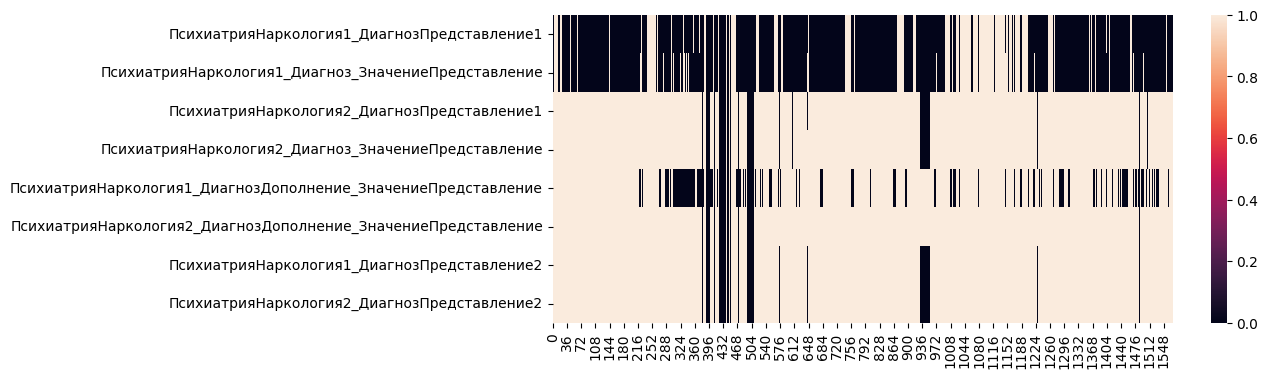

In [ ]:
plt.figure(figsize=(10,4))

sns.heatmap(data.isna().transpose())

In [ ]:
data[[list(data.columns)[0],list(data.columns)[1]]].value_counts()

ПсихиатрияНаркология1_ДиагнозПредставление1                          ПсихиатрияНаркология1_Диагноз_ЗначениеПредставление                                                                                                                               
Общий медицинский осмотр                                             [Z00.0] Общий медицинский осмотр_x000D_\n                                                                                                                                             1149
Тремор неуточненный                                                  [R25.1] Тремор неуточненный_x000D_\n                                                                                                                                                     9
Общий медицинский осмотр                                             [R25.1] Тремор неуточненный_x000D_\n                                                                                                                                       

In [ ]:
data = data.fillna('')
data.head()

,ПсихиатрияНаркология1_ДиагнозПредставление1,ПсихиатрияНаркология1_Диагноз_ЗначениеПредставление,ПсихиатрияНаркология2_ДиагнозПредставление1,ПсихиатрияНаркология2_Диагноз_ЗначениеПредставление,ПсихиатрияНаркология1_ДиагнозДополнение_ЗначениеПредставление,ПсихиатрияНаркология2_ДиагнозДополнение_ЗначениеПредставление,ПсихиатрияНаркология1_ДиагнозПредставление2,ПсихиатрияНаркология2_ДиагнозПредставление2
0,Общий медицинский осмотр,[Z00.0] Общий медицинский осмотр_x000D_\n,,,,,,
1,Общий медицинский осмотр,[Z00.0] Общий медицинский осмотр_x000D_\n,,,,,,
2,Общий медицинский осмотр,[Z00.0] Общий медицинский осмотр_x000D_\n,,,,,,
3,,,,,,,,
4,,,,,,,,


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 8 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   ПсихиатрияНаркология1_ДиагнозПредставление1                    1571 non-null   object
 1   ПсихиатрияНаркология1_Диагноз_ЗначениеПредставление            1571 non-null   object
 2   ПсихиатрияНаркология2_ДиагнозПредставление1                    1571 non-null   object
 3   ПсихиатрияНаркология2_Диагноз_ЗначениеПредставление            1571 non-null   object
 4   ПсихиатрияНаркология1_ДиагнозДополнение_ЗначениеПредставление  1571 non-null   object
 5   ПсихиатрияНаркология2_ДиагнозДополнение_ЗначениеПредставление  1571 non-null   object
 6   ПсихиатрияНаркология1_ДиагнозПредставление2                    1571 non-null   object
 7   ПсихиатрияНаркология2_ДиагнозПредставление2                    1571 no

 6   ПсихиатрияНаркология1_ДиагнозПредставление2                    104 non-null  (к удалению)

 
 7   ПсихиатрияНаркология2_ДиагнозПредставление2                    104 non-null  (к удалению)

In [ ]:
data = data.astype(str).apply(lambda x: x.str.replace(r'_x000D_\n', '', regex=True)) # замена служебных символов
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 8 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   ПсихиатрияНаркология1_ДиагнозПредставление1                    1571 non-null   object
 1   ПсихиатрияНаркология1_Диагноз_ЗначениеПредставление            1571 non-null   object
 2   ПсихиатрияНаркология2_ДиагнозПредставление1                    1571 non-null   object
 3   ПсихиатрияНаркология2_Диагноз_ЗначениеПредставление            1571 non-null   object
 4   ПсихиатрияНаркология1_ДиагнозДополнение_ЗначениеПредставление  1571 non-null   object
 5   ПсихиатрияНаркология2_ДиагнозДополнение_ЗначениеПредставление  1571 non-null   object
 6   ПсихиатрияНаркология1_ДиагнозПредставление2                    1571 non-null   object
 7   ПсихиатрияНаркология2_ДиагнозПредставление2                    1571 no

In [ ]:
columns = list(data.columns)
data['psycology_text'] = data[columns].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [ ]:
data[columns][5:6]

,ПсихиатрияНаркология1_ДиагнозПредставление1,ПсихиатрияНаркология1_Диагноз_ЗначениеПредставление,ПсихиатрияНаркология2_ДиагнозПредставление1,ПсихиатрияНаркология2_Диагноз_ЗначениеПредставление,ПсихиатрияНаркология1_ДиагнозДополнение_ЗначениеПредставление,ПсихиатрияНаркология2_ДиагнозДополнение_ЗначениеПредставление,ПсихиатрияНаркология1_ДиагнозПредставление2,ПсихиатрияНаркология2_ДиагнозПредставление2
5,,,,,,,,


In [ ]:
array = data['psycology_text'].unique()
array[0]
# list_str = re.split(' |_', array[1])
# list_str

'Общий медицинский осмотр_[Z00.0] Общий медицинский осмотр______'

In [ ]:
data[data['psycology_text'] == array[5]]['ПсихиатрияНаркология1_ДиагнозДополнение_ЗначениеПредставление']

219    Тесты на обобщение и исключение выполняет. В б...
Name: ПсихиатрияНаркология1_ДиагнозДополнение_ЗначениеПредставление, dtype: object

In [ ]:
s = re.split(' |_', array[0])
print(s)

['Общий', 'медицинский', 'осмотр', '[Z00.0]', 'Общий', 'медицинский', 'осмотр', '', '', '', '', '', '']


In [ ]:
array_1 = data[columns[0]].unique()
array_1

array(['Общий медицинский осмотр', '',
       'Органическое эмоционально лабильное [астеническое] расстройство',
       'Легкое когнитивное расстройство',
       'Паническое расстройство [эпизодическая пароксизмальная тревожность]',
       'Тремор неуточненный', 'Заикание [запинание]',
       'Расстройство личности органической этиологии'], dtype=object)

In [ ]:
array_2 = data[columns[1]].unique()
array_2[0][:7]

'[Z00.0]'

In [ ]:
array_2[0]

'[Z00.0] Общий медицинский осмотр'

In [ ]:
# !!!!
s = re.findall(r'(\D\d\d.\d)', array_2[3])
print(s)

['F06.6']


In [ ]:
s = re.findall('[|]', array_2[3])
print(s)

[]


In [ ]:
array_3 = df_representation['ПсихиатрияНаркология1_МКБ101'].unique()
array_3

array(['Z00.0', nan, 'F06.6', 'F06.7', 'F41.0', 'R25.1', 'F98.5', 'F07.0'],
      dtype=object)

In [ ]:
# a = re.split(' ', s[0])
# a

In [ ]:
array

array(['Общий медицинский осмотр_[Z00.0] Общий медицинский осмотр______',
       '_______', 'Общий медицинский осмотр_______',
       'Общий медицинский осмотр_[Z00.0] Общий медицинский осмотр_Общий медицинский осмотр_[Z00.0] Общий медицинский осмотр____',
       'Общий медицинский осмотр_[R25.1] Тремор неуточненный______',
       'Органическое эмоционально лабильное [астеническое] расстройство_[F06.6] Органическое эмоционально лабильное [астеническое] расстройство___Тесты на обобщение и исключение выполняет. В бытовых вопросах ориентируется. Критика достаточная.Заключение психиатра № А020- 8677 от 11.02. 2021г. противопоказаний к работе в должности ведущий инженер не выявлено.Заключение нарколога № 005993 ото 11.02.2021г. Противопоказаний не выявлено.В настоящее время находиться в состоянии стойкой компенсации.На момент осмотра противопоказаний для работы в должности ведущий инженер не выявлено.___',
       'Общий медицинский осмотр_[Z00.0] Общий медицинский осмотр___Тесты на обобщени

In [ ]:
array[5]

In [ ]:
def text_compare(string):
    list_str = re.split('_|[nan]', string)
    li = []
    for i in list_str:
        if i != '':
            if i not in li:
                li.append(i)
    
    return li

In [ ]:
# for i in range(len(array)):
#     n = text_compare(array[i])
#     print(n)

In [ ]:
data[list(data.columns)[4]].value_counts()

#### New Section

### Офтальмология (отдельный анализ)

In [ ]:
column = col_specialization[3]
columns_ophthalmology = to_analyse(df, specialization=column)


 0 Офтальмология1_ХР_Рекомендация1Представление [nan 'Допуск с ношением средств оптической коррекции зрения'
 'Использование средств оптической коррекции зрения'
 'Наблюдение офтальмолога по мж' 'Осмотр глазного дна 1 р/год'
 'Обследование и лечение офтальмолога' 'набдюдение по месту жительства ']

 1 Офтальмология1_ХР_Рекомендация2Представление [nan 'Осмотр глазного дна 1 р/год' 'Наблюдение офтальмолога по мж'
 'Измерение внутриглазного давления'
 'Использование средств оптической коррекции зрения'
 'Обследование и лечение офтальмолога']

 2 Офтальмология1_ДиагнозПредставление1 ['Общий медицинский осмотр' 'Миопия' 'Астигматизм' nan 'Гиперметропия'
 'Амблиопия вследствие анопсии' 'Птеригий'
 'Последствия травмы глаза и окологлазничной области'
 'Последствия травм, захватывающих несколько областей тела'
 'Косоглазие неуточненное' 'Врожденная катаракта'
 'Начальная старческая катаракта' 'Первичная открытоугольная глаукома'
 'Инсулиннезависимый сахарный диабет с неуточненными осложнениям

### Оториноларингология (отдельный анализ)

In [ ]:
column = col_specialization[4]
columns_otorhinolaryngology  = to_analyse(df, specialization=column)


 0 Оториноларингология1_ДиагнозПредставление1 ['Общий медицинский осмотр' nan 'Нейросенсорная потеря слуха неуточненная'
 'Нейросенсорная потеря слуха двусторонняя' 'Пресбиакузис'
 'Адгезивная болезнь среднего уха'
 'Нейросенсорная потеря слуха односторонняя с нормальным слухом на противоположном ухе'
 'Полип полости носа' 'Хронический туботимпанальный гнойный средний отит'
 'Гипертензивная [гипертоническая] болезнь с преимущественным поражением сердца без (застойной) сердечной недостаточности'
 'Аллергический ринит, вызванный пыльцой растений' 'Хронический ларингит'
 'Миопия']

 1 Оториноларингология1_ПрофнепригодностьВременнаяПредставление1 [nan 'Годен' 'Временно не годен' 'Годен, кроме п.']

 2 Оториноларингология1_ГоденНегоден_ЗначениеПредставление ['Годен' nan]

 3 Оториноларингология1_Жалобы_ЗначениеПредставление ['не предъявляет' nan]

 4 Оториноларингология1_Анамнез_ЗначениеПредставление ['не отягощен' nan]

 5 Оториноларингология1_ДефектыРечи_ЗначениеПредставление ['нет' nan]

### ХирургНеИсп (отдельный анализ + объединение)

In [ ]:
column = col_specialization[5]
columns_surgery_non  = to_analyse(df, specialization=column)


 0 ХирургНеИсп1_ДиагнозПредставление1 ['Общий медицинский осмотр' nan]

 1 ХирургНеИсп1_ПрофнепригодностьВременнаяПредставление1 [nan 'Годен']

 2 ХирургНеИсп1_ГоденНегоден_ЗначениеПредставление ['Годен' nan]

 3 ХирургНеИсп1_Жалобы_ЗначениеПредставление ['не предъявляет' nan]

 4 ХирургНеИсп1_Анамнез_ЗначениеПредставление ['не отягощен' nan]

 5 ХирургНеИсп1_ПериферическиеЛимфоузлы_ЗначениеПредставление ['не увеличены' nan]

 6 ХирургНеИсп1_Язык_ЗначениеПредставление ['влажный' nan]

 7 ХирургНеИсп1_Язык2_ЗначениеПредставление ['чистый' nan]

 8 ХирургНеИсп1_Мягкий_ЗначениеПредставление ['Нет' nan]

 9 ХирургНеИсп1_Напряженный_ЗначениеПредставление ['Нет' nan]

 10 ХирургНеИсп1_БезболезненныйПриПальпации_ЗначениеПредставление ['Нет' nan]

 11 ХирургНеИсп1_Болезненный_ЗначениеПредставление ['Нет' nan]

 12 ХирургНеИсп1_ПеритонеальныеЗнаки_ЗначениеПредставление ['отрицательные' nan]

 13 ХирургНеИсп1_ОтрицателенСОбеихСторон_ЗначениеПредставление ['Нет' nan]

 14 ХирургНеИсп1_Положителе

### Гинекология (отдельный анализ+объединение)

In [ ]:
column = col_specialization[6]
columns_gynecology  = to_analyse(df, specialization=column)


 0 Гинекология1_ХР_Рекомендация1Представление [nan 'УЗИ органов малого таза на 6-10 день м.ц.' 'Проведение кольпоскопии'
 'Консультация маммолога' 'Диспансерное наблюдение гинеколога']

 1 Гинекология1_ХР_Рекомендация2Представление [nan 'Обследование и лечение гинеколога' 'Проведение кольпоскопии'
 'УЗИ органов малого таза на 6-10 день м.ц.']

 2 Гинекология1_ДиагнозПредставление1 ['Общий медицинский осмотр' nan 'Фиброаденоз молочной железы'
 'Лейомиома матки' 'Другие и неуточненные кисты яичника'
 'Эндометриоз матки' 'Лейомиома матки неуточненная']

 3 Гинекология1_ПрофнепригодностьВременнаяПредставление1 ['Годен' nan 'Временно не годен']

 4 Гинекология1_ГоденНегоден_ЗначениеПредставление ['Годен' nan 'Не годен']

 5 Гинекология1_Жалобы_ЗначениеПредставление ['не предъявляет' nan]

 6 Гинекология1_Анамнез_ЗначениеПредставление ['не отягощен' nan 'отягощен']

 7 Гинекология1_Регулярные_ЗначениеПредставление ['Да' nan]

 8 Гинекология1_Нерегулярные_ЗначениеПредставление ['Нет' nan]

 

### ФункциональнаяДиагностика

In [ ]:
column = col_specialization[7]
columns_funct_diagnostics  = to_analyse(df, specialization=column)


 0 ФункциональнаяДиагностика1_ОбследованиеПроведено_ЗначениеПредставление ['да' nan]

 1 ФункциональнаяДиагностика1_ТемператураТела_ЗначениеПредставление [ nan 36.6]

 2 ФункциональнаяДиагностика1_ЭОС_ЗначениеПредставление [nan 'в промежуточном положении']

 3 ФункциональнаяДиагностика1_Заключение_ЗначениеПредставление [nan ', , ']

 4 ФункциональнаяДиагностика1_ЭКГПроведено_ЗначениеПредставление [nan 'Да' 'Нет']

 5 ФункциональнаяДиагностика1_ОписаниеЭКГ_ЗначениеПредставление [nan 'правильный']

 6 ФункциональнаяДиагностика1_ОписаниеЭКГ1_ЗначениеПредставление [nan 'синусовый']

 7 ФункциональнаяДиагностика1_ДиагнозПредставление1 [nan 'Общий медицинский осмотр']

 8 ФункциональнаяДиагностика1_ПрофнепригодностьВременнаяПредставление1 [nan 'Годен']

 9 ФункциональнаяДиагностика2_ОбследованиеПроведено_ЗначениеПредставление [nan 'да']

 10 ФункциональнаяДиагностика2_ТемператураТела_ЗначениеПредставление [ nan 36.6]

 11 ФункциональнаяДиагностика2_ЭОС_ЗначениеПредставление [nan 'в промежут

### Стоматология (детальный анализ)

In [ ]:
column = col_specialization[8]
columns_stomatology  = to_analyse(df, specialization=column)


 0 Стоматология1_ХР_Рекомендация1Представление [nan 'Консультация стоматолога-хирурга' 'Санация полости рта'
 'Профессинальная гигиена полости рта' 'Снятие зубных отложений']

 1 Стоматология1_ХР_Рекомендация2Представление [nan 'Санация полости рта' 'Консультация стоматолога-хирурга'
 'Снятие зубных отложений' 'Консультация стоматолога-ортопеда'
 'Рациональное зубопротезирование' 'Консультация пародонтолога']

 2 Стоматология1_ДиагнозПредставление1 ['Общий медицинский осмотр' nan
 'Гипертензивная [гипертоническая] болезнь с преимущественным поражением сердца без (застойной) сердечной недостаточности'
 'Миопия']

 3 Стоматология1_Классификация1Представление1 [nan 'Заключительный клинический']

 4 Стоматология1_ПрофнепригодностьВременнаяПредставление1 [nan 'Годен']

 5 Стоматология1_ГоденНегоден_ЗначениеПредставление ['Годен' nan]

 6 Стоматология1_Жалобы_ЗначениеПредставление ['не предъявляет' nan]

 7 Стоматология1_Анамнез_ЗначениеПредставление ['не отягощен' nan]

 8 Стоматология1_Пр

### Эндоскопия (анализ текста, объединение)

In [ ]:
column = col_specialization[9]
columns_endoscopy = to_analyse(df, specialization=column)


 0 Эндоскопия1_ЖалобыДополнение_ЗначениеПредставление ['Дискинезия желчевыводящих путей ' nan
 'Патологии со стороны слизистой пищевода, желудка и 12 п.к. не выявлено. '
 'Без патологии.' 'Эрозивный гастрит. ' ' Поверхостный гастрит. '
 'Поверхностный гастродуоденит. '
 'Поверхостный субатрофический гастрит.  '
 'Скользящая грыжа пищеводного отверстия диафрагмы. Эрозивный бульбит. '
 'Поверхностный гастробульбит.'
 'Скользящая грыжа пищеводного отверстия диафрагмы. Эрозивный гастрит. '
 'Дискинезия желчевыводящих путей Фолликулярный дуоденит. Эндоскопическая картина хронического панкреатита. '
 'Язва луковицы 12 п.к. по малой кривизне сразу за привратником 5х7 мм.  Поверхостный гастрит. Поверхностный бульбит. Рубцовая деформация луковицы двенадцатиперстной кишки. '
 'Поверхостный субатрофический гастрит.  Фолликулярный дуоденит. '
 'Катаральный эзофагит. Скользящая грыжа пищеводного отверстия диафрагмы. Поверхностный гастродуоденит. Эндоскопическая картина хронического панкреатита. '


### 10 Терапия (объединение, углубленный анализ по значениям столбцов)

In [ ]:
column = col_specialization[10]
columns_therapy = to_analyse(df, specialization=column)


 0 Терапия1_ХР_Рекомендация1Представление [nan 'Наблюдение гастроэнтеролога' 'Наблюдение кардиолога'
 'Поддерживать уровень АД не выше 140/90 мм рт.ст. Подбор гипотензивных препаратов у терапевта по месту жительства'
 'набдюдение по месту жительства ']

 1 Терапия1_ХР_Рекомендация2Представление [nan 'набдюдение по месту жительства '
 'Поддерживать уровень АД не выше 140/90 мм рт.ст. Подбор гипотензивных препаратов у терапевта по месту жительства'
 'Снижение избыточной массы тела']

 2 Терапия1_Температура_ЗначениеПредставление ['36,4' '36,5' '36.6' '36,3' '36,2' nan]

 3 Терапия1_АртериальноеДавление_ЗначениеПредставление ['140/100' '150/100' '120/80' '120\\80' '110/70' '105/70' '120/70'
 '140/80' '130\\80' '125/85' '133' '120' '100' '110' '130' '140' '160' nan
 '180' '125' '115' '150' '90' '135' '128' '138' '112' '129' '118' '155'
 '102' '144' '107' '105' '141' '182' '145' '131' '123' '193' '121' '127'
 '113' '132' '109' '117' '137' '124' '116' '171' '151' '142' '134' '146'
 '168' '1

### 11 Дерматовенерология (объединение данных, более детальный анализ)

In [ ]:
column = col_specialization[11]
columns_dermatovenereology = to_analyse(df, specialization=column)


 0 Дерматовенерология1_ХР_Рекомендация1Представление [nan 'Обследование и лечение дерматолога']

 1 Дерматовенерология1_ХР_Рекомендация2Представление [nan 'Диспансерное наблюдение дерматолога']

 2 Дерматовенерология1_ДиагнозПредставление1 [nan 'Общий медицинский осмотр' 'Псориаз обыкновенный']

 3 Дерматовенерология1_Классификация1Представление1 [nan 'Заключительный клинический']

 4 Дерматовенерология1_Классификация2Представление1 [nan 'Хроническое, впервые выявленное']

 5 Дерматовенерология1_ПрофнепригодностьВременнаяПредставление1 [nan 'Годен' 'Временно не годен']

 6 Дерматовенерология1_ГоденНегоден_ЗначениеПредставление [nan 'Годен']

 7 Дерматовенерология1_Жалобы_ЗначениеПредставление [nan 'не предъявляет']

 8 Дерматовенерология1_Анамнез_ЗначениеПредставление [nan 'не отягощен']

 9 Дерматовенерология1_КожныеПокровы_ЗначениеПредставление [nan 'чистые']

 10 Дерматовенерология1_НогтевыеПластинки_ЗначениеПредставление [nan 'в норме']

 11 Дерматовенерология1_КожаВолосистойЧасти

### 12 Неврология (более детальный анализ, объединение столбцов?, текстовые данные)

In [ ]:
column = col_specialization[12]
columns_therapy = to_analyse(df, specialization=column)


 0 Неврология1_ДиагнозПредставление1 [nan 'Общий медицинский осмотр' 'Остеохондроз позвоночника у взрослых'
 'Последствия инсульта, не уточненные как кровоизлияние или инфаркт мозга'
 'Другие наследственные спинальные мышечные атрофии'
 'Эссенциальный тремор' 'Церебральный атеросклероз'
 'Сахарный диабет неуточненный с неуточненными осложнениями'
 'Открытая рана неуточненной части предплечья'
 'Цереброваскулярная болезнь неуточненная'
 'Гипертензивная [гипертоническая] болезнь с преимущественным поражением сердца без (застойной) сердечной недостаточности'
 'Мононевропатия неуточненная']

 1 Неврология1_Классификация2Представление1 [nan 'Хроническое, ранее выявленное' 'Обострение хронического' 'Острое']

 2 Неврология1_ПрофнепригодностьВременнаяПредставление1 [nan 'Годен' 'Годен, кроме п.' 'Временно не годен']

 3 Неврология1_ГоденНегоден_ЗначениеПредставление [nan 'Годен' 'Не годен']

 4 Неврология1_Жалобы_ЗначениеПредставление [nan 'не предъявляет']

 5 Неврология1_Анамнез_ЗначениеПр

### 13 УЗИДиагностика (детальный анализ, текстовые данные, объединение данных (формирование текстового описания)

In [ ]:
column = col_specialization[13]
columns_ultrasound = to_analyse(df, specialization=column)


 0 УЗИДиагностика1_Заключение_ЗначениеПредставление [nan 'Эхопатологии на момент осмотра не выявлено '
 'Полип желчного пузыря.'
 '_x000D_\nВизуализация поджелудочной железы затруднена из-за пневмотизации кишечника Диффузные изменения паренхимы печени по типу жирового гепатоза.'
 'патологии не обнаружено' 'Фиброзная мастопатия'
 'Осмотр после ФГДС. Диф. измен. паренхимы печени по типу жировой инфильтрации, паренхимы ПЖ.'
 'Диф. изменения паренхимы печени и ПЖ.'
 'УЗ - признаки диф. изменений паренхимы ПЖ.'
 'Диф. изменения паренхимы ПЖ.'
 'УЗ - признаки диффузных изменений паренхимы ПЖ. Умеренная гепатомегалия.'
 'Полип ЖП.' 'Эхопатологии на момент осмотра не выявлено. '
 'Умеренная гепатомегалия. Диф. изменения паренхимы ПЖ '
 'Диффузные изменения паренхимы поджелудочной железы.'
 'Диф. изменения паренхимы печени и ПЖ, гепатомегалия. Полипы ЖП. Конкремент? (ближе к шейке в-ся гиперэхогенное образование 12 мм, со слабой акустической тенью, в режиме ЦДК без кровотока)'
 'Диф. изменения

### 14 Хирургия (детальный анализ, объединение данных)

In [ ]:
column = col_specialization[14]
columns_surgery = to_analyse(df, specialization=column)

### 15 ЭКГНеИсп1 (к удалению)

In [ ]:
column = col_specialization[15]
columns_ECG_unused = to_analyse(df, specialization=column)

### 16 ПроцедурнаяМедсестра (к удалению)

In [ ]:
column = col_specialization[16]
columns_nurse = to_analyse(df, specialization=column)

### 17 ПсихиатрияНаркология

In [ ]:
column = col_specialization[17]
columns_psycho = to_analyse(df, specialization=column)

### 18 ТерапевтНеИсп1 (уточнить отличия от терапевта, объединение в текст, формирование категорий)

In [ ]:
column = col_specialization[18]
columns_therapy = to_analyse(df, specialization=column)

# New Section

Разбить данные в секциях по категориям
1. Категориальные 
2. Числовые
--
3. Текстовые 
--
- к удалению
- к объединению

